# **Analisis y Curación de Datos**

## Grupo 8 Comisión 2
- Leonardo Rodríguez
- Sergio Sulca
- Emanuel Alberto Matar Allasino
- Maria Emilia Fernandez
- Martín Barrera
- Matthew Aguerreberry

---

In [ ]:
import sys
if 'ftfy' not in sys.modules:
    !pip install 'ftfy<5.6'
if 'feedparser' not in sys.modules:
    !pip install feedparser

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import feedparser
from hashlib import md5

sns.set_context(context='talk', font_scale=1.2)

     |████████████████████████████████| 51kB 2.4MB/s 
     |████████████████████████████████| 194kB 5.4MB/s 
  Created wheel for feedparser: filename=feedparser-5.2.1-cp36-none-any.whl size=44940 sha256=249c03a87d2e6695a78e69f5ac3004fa84aa58b7eb791956eeefb9b9e5384f98
  Stored in directory: /root/.cache/pip/wheels/8c/69/b7/f52763c41c5471df57703a0ef718a32a5e81ee35dcf6d4f97f
Successfully built feedparser


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##  Ejercicio 1: Tablas de Crecimiento
---
1. Descargar dataset en CSV

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/DiploDatos/AnalisisYCuracion/master/input/wtageinf.csv')
df

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,0.0,1.815151,3.530203,0.152385,2.355451,2.526904,2.773802,3.150611,3.530203,3.879077,4.172493,4.340293,4.446488
1,1,0.5,1.547523,4.003106,0.146025,2.799549,2.964656,3.209510,3.597396,4.003106,4.387423,4.718161,4.910130,5.032625
2,1,1.5,1.068796,4.879525,0.136479,3.614688,3.774849,4.020561,4.428873,4.879525,5.327328,5.728153,5.967102,6.121929
3,1,2.5,0.695974,5.672889,0.129678,4.342341,4.503255,4.754479,5.183378,5.672889,6.175598,6.638979,6.921119,7.106250
4,1,3.5,0.419815,6.391392,0.124717,4.992898,5.157412,5.416803,5.866806,6.391392,6.942217,7.460702,7.781401,7.993878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2,32.5,-0.955723,13.340229,0.115115,10.957219,11.209345,11.620537,12.377573,13.340229,14.461065,15.639570,16.439044,17.002447
72,2,33.5,-0.974381,13.489134,0.116193,11.064747,11.320538,11.738058,12.507913,13.489134,14.634908,15.843647,16.666048,17.246809
73,2,34.5,-0.991981,13.638774,0.117286,11.172248,11.431774,11.855740,12.638647,13.638774,14.809981,16.049626,16.895526,17.494115
74,2,35.5,-1.008641,13.789365,0.118387,11.279999,11.543323,11.973842,12.770013,13.789365,14.986470,16.257667,17.127623,17.744504


2. Graficar las curvas correspondientes a cada percentil para niños y niñas

 * a. En la columna Sex, 1 representa a niños y 2 a niñas
 * b. Las curvas de los percentiles correspondientes a un mismo sexo deben ir en 
un mismo gráfico. 
 * c. Un gráfico para cada sexo.

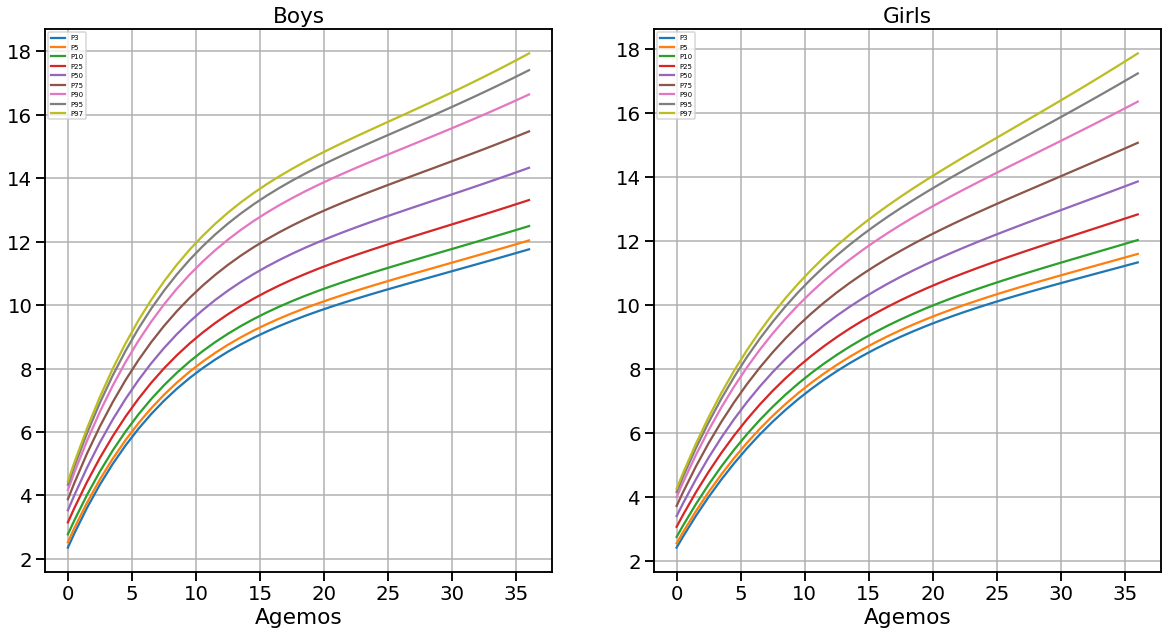

In [ ]:
fig, ax = plt.subplots(1, 2 , figsize=(20, 10))
df[df.Sex == 1].plot(
    x='Agemos', 
    y=['P3',	'P5',	'P10',	'P25',	'P50',	'P75',	'P90',	'P95', 'P97'],
    ax=ax[0])
df[df.Sex == 2].plot(
    x='Agemos', 
    y=['P3',	'P5',	'P10',	'P25',	'P50',	'P75',	'P90',	'P95', 'P97'],
    ax=ax[1])
ax[0].grid(True)
ax[0].set_title("Boys")
ax[0].legend(fontsize='x-small')

ax[1].grid(True)
ax[1].set_title("Girls")
ax[1].legend(fontsize='x-small')
plt.show()

## Ejercicio 2: Pasos Fronterizos
---

Descargar dataset en JSON

In [ ]:
data_json = pd.read_json("https://raw.githubusercontent.com/DiploDatos/AnalisisYCuracion/master/input/pasos.json")

In [ ]:
data_json["province"].unique()

array(['Tierra del Fuego', 'Santa Cruz',
       'AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ',
       'Chubut', 'Rio Negro', 'Neuquen', 'NEUQUEN', 'Buenos Aires',
       'Mendoza', 'San Luis', 'San Juan', 'Santa Fe', 'Córdoba',
       'Cordoba', 'Entre Rios', 'La Rioja', 'Corrientes', 'Catamarca',
       'Santiago del Estero', 'Tucuman', 'Chaco', 'Misiones', 'Formosa',
       'Salta', 'Jujuy'], dtype=object)

In [ ]:
replaces = {
    "Cordoba": "Córdoba",
    "AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ": "Santa Cruz",
    "NEUQUEN": "Neuquen"
}
data_json = data_json.replace(replaces)
data_json["province"].unique()

array(['Tierra del Fuego', 'Santa Cruz', 'Chubut', 'Rio Negro', 'Neuquen',
       'Buenos Aires', 'Mendoza', 'San Luis', 'San Juan', 'Santa Fe',
       'Córdoba', 'Entre Rios', 'La Rioja', 'Corrientes', 'Catamarca',
       'Santiago del Estero', 'Tucuman', 'Chaco', 'Misiones', 'Formosa',
       'Salta', 'Jujuy'], dtype=object)

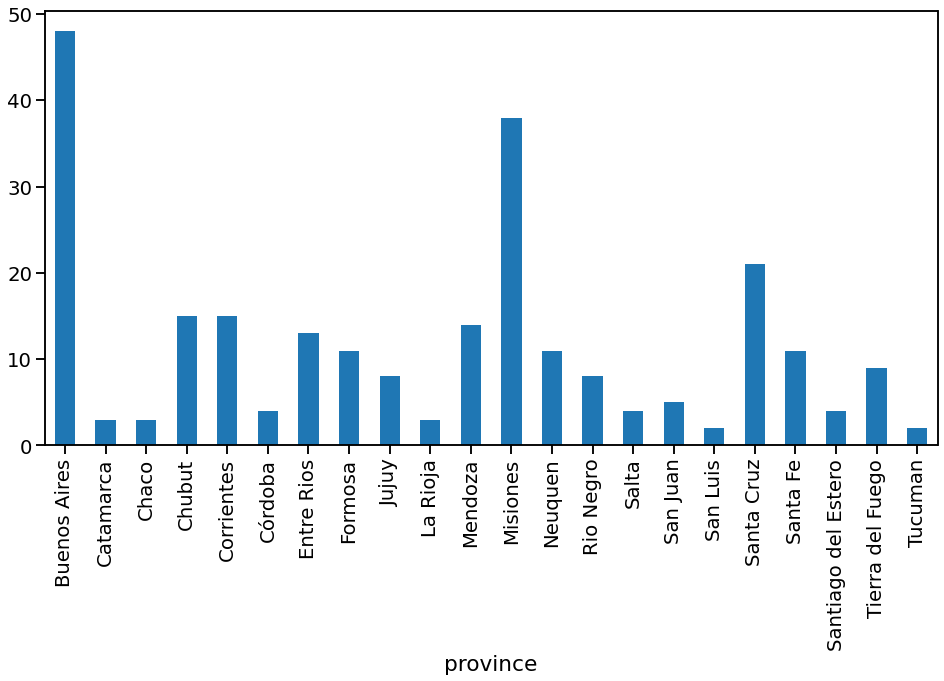

In [ ]:
fig, ax = plt.subplots(1, 1 , figsize=(16,8))
data_json.groupby("province").count()["location"].plot.bar(ax=ax)
plt.show()

## Ejercicio 3: Representación de grafos
---

In [ ]:
edgeList = [[0, 2], [1, 3], [2, 3], [2, 4], [3, 5], [4, 5]]
edgePairs = [(edge[0], edge[1]) for edge in edgeList]
nodes_set = set([s for (s, _) in edgePairs] + [t for (_, t) in edgePairs])
size = max(nodes_set) + 1
adjMatrix = [[0] * size for _ in range(size)]
for (s, t) in edgePairs:
    adjMatrix[s][t] = 1       
adjMatrix

[[0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 1, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0]]

In [ ]:
adjList = {}
for s in nodes_set:
    adjList[s] = [t for (source, t) in edgePairs if source == s]
adjList

{0: [2], 1: [3], 2: [3, 4], 3: [5], 4: [5], 5: []}

## Ejercicio 4: Ingestión de Datos - SQL
---


In [ ]:
!wget https://cdn.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
!unzip -o chinook.zip

--2020-07-24 16:15:47--  https://cdn.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
Resolving cdn.sqlitetutorial.net (cdn.sqlitetutorial.net)... 151.139.128.11
Connecting to cdn.sqlitetutorial.net (cdn.sqlitetutorial.net)|151.139.128.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305596 (298K) [application/zip]
Saving to: ‘chinook.zip’

chinook.zip         100%[===================>] 298.43K  --.-KB/s    in 0.02s   

2020-07-24 16:15:47 (12.1 MB/s) - ‘chinook.zip’ saved [305596/305596]

Archive:  chinook.zip
  inflating: chinook.db              


In [ ]:
conn = sqlite3.connect('chinook.db')

def query_dataset(query):
    c = conn.cursor()
    rows = c.execute(query)
    cols = [column[0] for column in rows.description]
    results= pd.DataFrame.from_records(data = rows.fetchall(), columns = cols)
    c.close()
    return results

### 4.1 Canciones de Iron Maiden


```sql
select distinct tracks.Name 
from artists
inner join albums 
    on artists.ArtistId = albums.ArtistId
inner join tracks 
    on tracks.AlbumId = albums.AlbumId 
where artists.Name = "Iron Maiden"
order by tracks.Name asc
```

Query usando `pandas`

In [ ]:
iron_maiden_songs_query = """
    select distinct tracks.Name from artists
    inner join albums on artists.ArtistId = albums.ArtistId
    inner join tracks on tracks.AlbumId = albums.AlbumId 
    where artists.Name = "Iron Maiden"
    order by tracks.Name asc
"""
query_dataset(iron_maiden_songs_query)

,Name
0,01 - Prowler
1,02 - Sanctuary
2,03 - Remember Tomorrow
3,04 - Running Free
4,05 - Phantom of the Opera
...,...
145,Weekend Warrior
146,When Two Worlds Collide
147,Where Eagles Dare
148,Wildest Dreams


### 4.2 Discos con más de 25 canciones

```sql
select  albums.Title as "Album Title",
        count(TrackId) as song_num 
from albums
inner join tracks 
    on albums.AlbumId = tracks.AlbumId
group by albums.AlbumId
having song_num > 25
order by song_num desc

```


In [ ]:
long_albums = """
    select albums.Title as "Album Title", count(TrackId) as song_num from albums
    inner join tracks on albums.AlbumId = tracks.AlbumId
    group by albums.AlbumId
    having song_num > 25
    order by song_num desc
"""
query_dataset(long_albums)

,Album Title,song_num
0,Greatest Hits,57
1,Minha Historia,34
2,Unplugged,30
3,"Lost, Season 3",26


### 4.3 Las 10 canciones más populares

```sql
select  tracks.Name, 
        count(playlist_track.PlaylistId) as occurences 
from playlist_track
inner join tracks 
    on playlist_track.TrackId = tracks.TrackId
group by playlist_track.TrackId
order by occurences desc
limit 10
```

In [ ]:
top_songs = """
    select tracks.Name, count(playlist_track.PlaylistId) as occurences from playlist_track
    inner join tracks on playlist_track.TrackId = tracks.TrackId
    group by playlist_track.TrackId
    order by occurences desc
    limit 10
"""
query_dataset(top_songs)

,Name,occurences
0,Intoitus: Adorate Deum,5
1,"Miserere mei, Deus",5
2,"Aria Mit 30 Veränderungen, BWV 988 ""Goldberg V...",5
3,"Suite for Solo Cello No. 1 in G Major, BWV 100...",5
4,"The Messiah: Behold, I Tell You a Mystery... T...",5
5,Solomon HWV 67: The Arrival of the Queen of Sheba,5
6,Symphony No.5 in C Minor: I. Allegro con brio,5
7,Ave Maria,5
8,"Nabucco: Chorus, ""Va, Pensiero, Sull'ali Dorate""",5
9,Die Walküre: The Ride of the Valkyries,5


### 4.4 Reescribir la siguiente consulta con JOIN

```sql

SELECT trackid,
       name
FROM tracks
WHERE albumid = (
      SELECT albumid
      FROM albums
      WHERE title = 'Let There Be Rock'
);

```
Rta:

```sql
select tracks.TrackId, 
       tracks.Name 
from tracks
inner join albums 
    on tracks.AlbumId = albums.AlbumId
where albums.Title = "Let There Be Rock"
order by tracks.TrackId asc
```

In [ ]:
an_album_tracks = """
    select tracks.TrackId, tracks.Name from tracks
    inner join albums on tracks.AlbumId = albums.AlbumId
    where albums.Title = "Let There Be Rock"
    order by tracks.TrackId asc
"""
query_dataset(an_album_tracks)

,TrackId,Name
0,15,Go Down
1,16,Dog Eat Dog
2,17,Let There Be Rock
3,18,Bad Boy Boogie
4,19,Problem Child
5,20,Overdose
6,21,Hell Ain't A Bad Place To Be
7,22,Whole Lotta Rosie


## Ejercicio 5: RSS Ingestion
---

### Títulos de artículos de Tecnología


In [ ]:
feed = feedparser.parse("https://www.lavoz.com.ar/rss/tecnologia.xml")
titles = [e["title"] for e in feed.entries]
pd.DataFrame(titles,  columns=["Titulo"])

,Titulo
0,"Fifa 21 trae novedades en el modo carrera, un ..."
1,Ya se puede retransmitir en directo en Faceboo...
2,Twitter tuvo un primer semestre para el olvido...
3,Twitter: hackers accedieron a mensajes privado...
4,Google pospone a marzo de 2021 la indexación d...
5,Nuevas medidas de seguridad para Facebook Mess...
6,Lenovo presenta su primer smartphone gaming: L...
7,Gmail verificará la identidad de las empresas ...
8,Sólo Facebook sabe qué es lo más popular en su...
9,Día del Amigo: las videollamadas por Whatsapp ...


## Ejercicio 6: Limpieza de Datos
---

In [ ]:
in_colab = 'google.colab' in sys.modules

if in_colab:
  BASE_DIR = "https://github.com/DiploDatos/AnalisisYCuracion/raw/master/"
else:
  BASE_DIR = ".."

In [ ]:
kickstarter_2018 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv", 
                               parse_dates=["deadline","launched"],
                               index_col=['ID'])
kickstarter_2018

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00


###6.1 Detección de datos duplicados

Armar una tabla con todos los proyectos con nombres duplicados, ordenados para revisar agrupados.

In [ ]:
duplicated_names = kickstarter_2018[kickstarter_2018.duplicated(subset=["name"], keep=False)].sort_values(by=["name", "launched"])
duplicated_names

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
816998285,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-02-09,6500.0,2013-12-19 21:51:50,0.0,canceled,0,US,0.00,0.00,6500.00
815783250,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-03-01,6500.0,2014-01-03 20:39:16,37.0,failed,3,US,37.00,37.00,6500.00
1010584633,"""A Fresh Start""",Shorts,Film & Video,USD,2011-09-25,3000.0,2011-08-28 21:27:52,3000.0,successful,24,US,3000.00,3000.00,3000.00
713417995,"""A Fresh Start""",Documentary,Film & Video,USD,2013-03-27,5000.0,2013-01-26 03:51:47,1417.0,failed,26,US,1417.00,1417.00,5000.00
1880084695,"""American Sports Stories"" - An Athletic Quest",Shorts,Film & Video,USD,2015-08-26,100000.0,2015-06-27 02:02:00,100.0,failed,1,US,100.00,100.00,100000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839948714,xxx (Canceled),Food,Food,USD,2014-04-26,55000.0,2014-03-21 18:45:06,13591.0,canceled,156,US,13591.00,13591.00,55000.00
796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00
1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00


###6.2 Verificación de consistencia de la función de hashing

Verificar que los proyectos que tienen nombres duplicados también tienen el hash de nombre duplicado



In [ ]:
def hashit(val):
    if isinstance(val, float): 
        return str(val)
    return md5(val.encode('utf-8')).hexdigest()

In [ ]:
hashed_dataset = kickstarter_2018.copy()
hashed_dataset["name"].apply(hashit).to_frame()

,name
ID,
1000002330,a6828ae8a2eca25f0dd7035efc0af0a0
1000003930,81609b3bdc0b96f429672d69702f2524
1000004038,c12f5c3bace2f0213cdb2679a265dca0
1000007540,4dbdcf09c86bbf5683ec39bc57b77f81
1000011046,9c01404a2ef702811c2088ce139042ad
...,...
999976400,d89228576343394467096843057f3aa4
999977640,bbcb30bd9bd4f9bff0a96fc44d0001f0
999986353,6c3094666e1a315b6e179566fe3972d9


In [ ]:
duplicated_names["hash"] = duplicated_names["name"].apply(hashit)
hash_nunique = duplicated_names.groupby(["name"])["hash"].agg(["nunique"])
hash_nunique.columns = ["hash_count"]
hash_nunique

,hash_count
name,
"""...The Last shall be first..."" LODB Lifestyle Project",1
"""A Fresh Start""",1
"""American Sports Stories"" - An Athletic Quest",1
"""City of Mercy"" (Canceled)",1
"""Color"" Music Video",1
...,...
test (Canceled),1
weSTAND: A Stand With a Mission,1
x,1


In [ ]:
hash_nunique[hash_nunique.hash_count > 1].any()

hash_count    False
dtype: bool

###6.3 Manejo del encoding de datos

Comparar la cantidad de nombres raros en kickstarter_2018 con la que obtenemos al cargar `ks-projects-201801.csv` con encoding iso-8859-1

In [ ]:
kickstarter_2018_wrong = pd.read_csv(
    BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv", 
    parse_dates=["deadline","launched"],
    index_col=['ID'], encoding="ISO-8859-1")

In [ ]:
import ftfy.badness as bad
def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)

def add_weirdness(df):
  df['name_weirdness'] = df['name'].apply(weird)

add_weirdness(kickstarter_2018)
kickstarter_2018[kickstarter_2018.name_weirdness > 1][["name_weirdness"]].describe()


,name_weirdness
count,26.000000
mean,2.192308
std,0.567044
min,2.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,4.000000


In [ ]:
add_weirdness(kickstarter_2018_wrong)
kickstarter_2018_wrong[kickstarter_2018_wrong.name_weirdness > 1][["name_weirdness"]].describe()

,name_weirdness
count,7682.000000
mean,3.527206
std,1.966747
min,2.000000
25%,2.000000
50%,4.000000
75%,4.000000
max,20.000000


###6.4 Preprocesamiento de variables categóricas

**Codificar** *currency* con ambas estrategias (vistas en clase)

In [ ]:
from sklearn import preprocessing

In [ ]:
column='currency'
le = preprocessing.LabelEncoder()
le.fit(kickstarter_2018[column])

LabelEncoder()

In [ ]:
dict(zip(le.classes_,le.transform(le.classes_)))

{'AUD': 0,
 'CAD': 1,
 'CHF': 2,
 'DKK': 3,
 'EUR': 4,
 'GBP': 5,
 'HKD': 6,
 'JPY': 7,
 'MXN': 8,
 'NOK': 9,
 'NZD': 10,
 'SEK': 11,
 'SGD': 12,
 'USD': 13}

In [ ]:
kickstarter_2018[column] = le.transform(kickstarter_2018[column]) 
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,5,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,13,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0
1000004038,Where is Hank?,Narrative Film,Film & Video,13,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,13,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,13,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0


In [ ]:
kickstarter_2018[column] = le.inverse_transform(kickstarter_2018[column]) 
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0


In [ ]:
from sklearn.preprocessing import LabelBinarizer
other_column = 'currency'

lb = LabelBinarizer()

lb_results = lb.fit_transform(kickstarter_2018[other_column])
pd.DataFrame(lb_results, columns=((other_column + '_') + pd.Series(lb.classes_))).head(10)

,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1


###6.5 Validación de integridad



####6.5.1 ¿Hay proyecto éxitosos que no consiguieron el objetivo? Si hay, ¿Qué porcentaje sí y cuál no?

In [ ]:
successful_not_goal = kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged < kickstarter_2018.goal)]
successful_goal = kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged >= kickstarter_2018.goal)]
successful_not_goal

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1368992939,Santa's Sled,Art,Art,USD,2012-08-27,3600.0,2012-07-26 03:31:28,3599.69,successful,64,US,3599.69,3599.69,3600.00,0
1769772834,Borders of the Imagination - An Epic Sci-Fi/Fa...,Shorts,Film & Video,USD,2015-12-27,36000.0,2015-11-12 19:06:18,30716.00,successful,275,US,30716.00,30716.00,36000.00,0
251325270,Documentary film about Les Blank.,Documentary,Film & Video,USD,2010-07-18,8000.0,2010-06-02 22:15:38,7999.65,successful,73,US,7999.65,7999.65,8000.00,0
4732285,Insiders/Out: Exploring Outsider Art in America,Art,Art,USD,2010-07-08,2000.0,2010-05-27 00:26:33,1999.66,successful,30,US,1999.66,1999.66,2000.00,0
780863434,TUW Ruhla Watches - Comeback of a Legend,Product Design,Design,EUR,2016-03-19,25000.0,2016-02-08 19:14:02,24892.50,successful,90,DE,27778.24,27765.07,27884.98,0


In [ ]:
print('Porcentaje que SI consiguieron:')
len(successful_not_goal) / len(kickstarter_2018[kickstarter_2018.state == "successful"])

Porcentaje que SI consiguieron:


3.732568903221953e-05

In [ ]:
print('Porcentaje que NO consiguieron:')
len(successful_goal) / len(kickstarter_2018[kickstarter_2018.state == "successful"])

Porcentaje que NO consiguieron:


0.9999626743109677

####6.5.2 Calcular una tabla con la cantidad de proyectos por categoría principal y estado.

In [ ]:
cols = ['name', 'state', 'main_category']
kickstarter_2018[cols].pivot_table(
    values='name', index='state', columns='main_category', aggfunc='count'
)

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
state,,,,,,,,,,,,,,,
canceled,2222.0,842.0,843.0,163.0,4152.0,2650.0,5755.0,2211.0,6202.0,523.0,3305.0,986.0,3602.0,4715.0,608.0
failed,14130.0,4036.0,5703.0,1235.0,14814.0,14182.0,32903.0,15969.0,16002.0,3137.0,21752.0,6384.0,23145.0,20616.0,3708.0
live,194.0,76.0,76.0,18.0,305.0,250.0,332.0,184.0,287.0,31.0,281.0,48.0,299.0,377.0,41.0
successful,11510.0,5842.0,2115.0,2338.0,10550.0,5593.0,23623.0,6085.0,12518.0,1012.0,24197.0,3305.0,12300.0,6434.0,6534.0
suspended,96.0,23.0,72.0,13.0,246.0,138.0,117.0,153.0,220.0,52.0,149.0,55.0,66.0,424.0,21.0
undefined,NaN,NaN,NaN,1.0,2.0,3.0,854.0,NaN,1.0,NaN,2234.0,1.0,462.0,3.0,1.0


###6.6 Identificar valores atípicos/outliers¶


####6.6.1 Calcular los valores atípicos de `usd_goal_real` y graficar los boxplots, con y sin estos valores por categoría

In [ ]:
%matplotlib inline

outliers = kickstarter_2018[kickstarter_2018.usd_goal_real > (kickstarter_2018.usd_goal_real.mean() + 
                                                            3 * kickstarter_2018.usd_goal_real.std())]
outliers

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1009207145,** GOLIATH **,Product Design,Design,CAD,2014-07-21,3850000.0,2014-06-21 22:34:21,285.0,failed,5,CA,263.41,264.67,3575408.62,0
1015466274,Genesis,Film & Video,Film & Video,EUR,2015-09-01,5000000.0,2015-07-07 21:14:52,0.0,failed,0,IT,0.00,0.00,5568982.99,0
1016210580,INDIRA – THE FIRST INDIAN GRAND MUSICAL,Musical,Theater,EUR,2016-04-27,15000000.0,2016-02-27 13:08:01,15.0,failed,6,ES,16.59,17.10,17104542.97,-1
1025947904,Long island city new york art book (Canceled),Photography,Photography,USD,2013-11-07,10000000.0,2013-10-08 23:16:26,0.0,canceled,0,US,0.00,0.00,10000000.00,0
1029500715,Harambe World's Tallest Statue,Public Art,Art,USD,2016-11-25,20000000.0,2016-09-26 18:08:01,1.0,canceled,1,US,0.00,1.00,20000000.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992335258,XPOINT5 (Canceled),Web,Technology,USD,2015-11-09,5000000.0,2015-09-10 23:08:39,0.0,canceled,0,US,0.00,0.00,5000000.00,0
992624421,I don't know a comic book?,Comics,Comics,USD,2014-08-09,10000000.0,2014-07-10 06:11:48,10.0,failed,1,US,10.00,10.00,10000000.00,0
993969686,Albert Einstein Museum,Technology,Technology,USD,2014-12-20,50000000.0,2014-10-23 01:46:17,240.0,failed,8,US,240.00,240.00,50000000.00,0


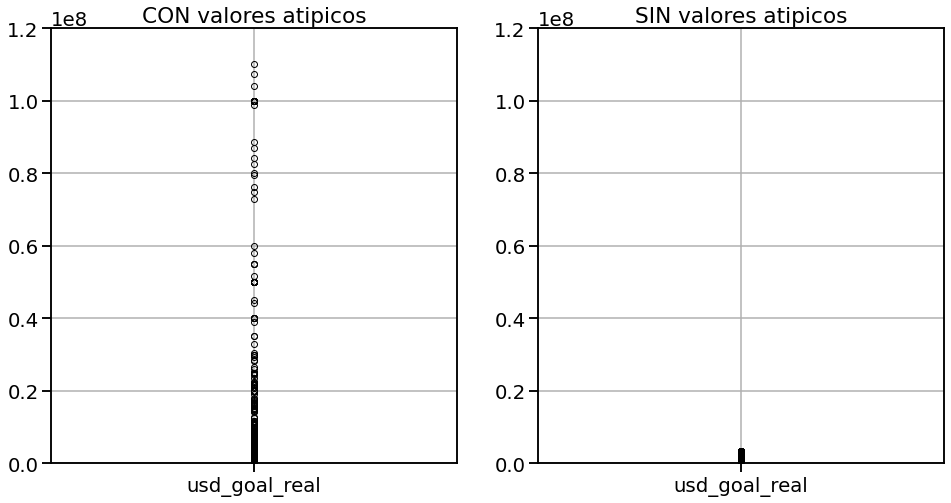

In [ ]:
fig = plt.figure(figsize=(16, 8))

ax1 = plt.subplot('121')
kickstarter_2018.boxplot(column='usd_goal_real', ax=ax1);
ax1.set_title('CON valores atipicos')
ax1.set_ylim((0, 1.2e8))

ax2 = plt.subplot('122')
kickstarter_2018[
    kickstarter_2018.usd_goal_real <=
    (kickstarter_2018.usd_goal_real.mean() + 3 * kickstarter_2018.usd_goal_real.std())
].boxplot(column='usd_goal_real', ax=ax2);
ax2.set_title('SIN valores atipicos')
ax2.set_ylim((0, 1.2e8))
plt.show()

####6.6.2 Análisis por categoría principal:

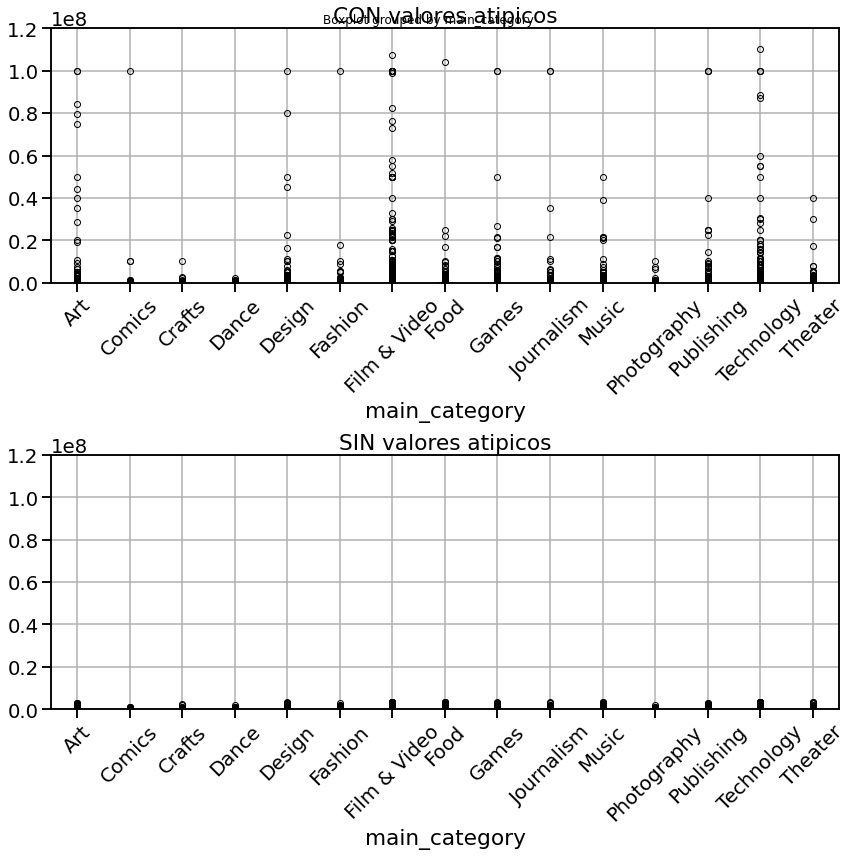

In [ ]:

fig = plt.figure(figsize=(12, 12))
ax1 = plt.subplot('211')

kickstarter_2018.boxplot(column='usd_goal_real',by='main_category', ax=ax1)
ax1.set_title('CON valores atipicos')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_ylim((0, 1.2e8))

ax2 = plt.subplot('212')
kickstarter_2018.drop(outliers.index).boxplot(
    column='usd_goal_real',by='main_category', ax=ax2)
ax2.set_title('SIN valores atipicos')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.set_ylim((0, 1.2e8))

fig.tight_layout()

### 6.7. Evaluar cómo comprimir los datos para su almacenamiento más eficiente.

En la actualidad, en las nubes el almacenamiento no suele ser problema sino la velocidad para leerlo que suele ser determinante a la hora de determinar el formato de almacenamiento.

El formato preferido es feather por la velocidad de carga acorde a este [post](https://towardsdatascience.com/the-best-format-to-save-pandas-data-414dca023e0d) Pero no tiene soporte para python 3.8+, el segundo formato es pickle


```python
kickstarter_2018.to_pickle('output/ks-projects-201801-for-pandas.pickle')
```